# CSCI 3360 Course Project Code (Group 2)

## Import Data & Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from scipy.stats import norm,iqr
from scipy.special import expit, logit
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from wordcloud import WordCloud
from sklearn.metrics import classification_report, confusion_matrix

USData = pd.read_csv("/Users/navyabingi/Downloads/archive/USvideos.csv")
USData

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...


## Overall Summary Statistics

In [3]:
# Video with most views
print("Max views: ", USData['views'].max(),"(Childish Gambino - This Is America (Official Video)") 
#plt.hist(USData.views,bins=np.arange(min(USData.views), max(USData.views) + 10, 10))

# Video with most likes
print("Max likes: ", USData['likes'].max(),"(BTS (Î∞©ÌÉÑÏÜåÎÖÑÎã®) 'FAKE LOVE' Official MV)") 
# Video with most dislikes
print("Max dislikes: ", USData['dislikes'].max(),"(So Sorry - Logan Paul Vlogs)") # So Sorry. 


USData[["views","likes","dislikes"]].describe()

Max views:  225211923 (Childish Gambino - This Is America (Official Video)
Max likes:  5613827 (BTS (Î∞©ÌÉÑÏÜåÎÖÑÎã®) 'FAKE LOVE' Official MV)
Max dislikes:  1674420 (So Sorry - Logan Paul Vlogs)


,views,likes,dislikes
count,4.094900e+04,4.094900e+04,4.094900e+04
mean,2.360785e+06,7.426670e+04,3.711401e+03
std,7.394114e+06,2.288853e+05,2.902971e+04
min,5.490000e+02,0.000000e+00,0.000000e+00
25%,2.423290e+05,5.424000e+03,2.020000e+02
50%,6.818610e+05,1.809100e+04,6.310000e+02
75%,1.823157e+06,5.541700e+04,1.938000e+03
max,2.252119e+08,5.613827e+06,1.674420e+06


Text(0.5, 1.0, 'Views Distribution')

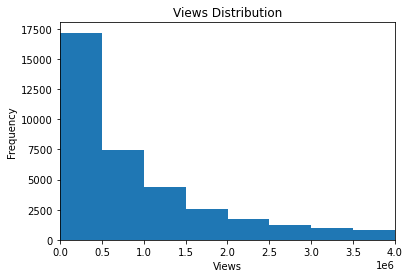

In [4]:
plt.hist(USData.views,bins=np.arange(min(USData.views), max(USData.views) + 500000, 500000))
plt.xlim([0,4000000])
plt.xlabel("Views")
plt.ylabel("Frequency")
plt.title("Views Distribution")

Text(0.5, 1.0, 'Likes Distribution')

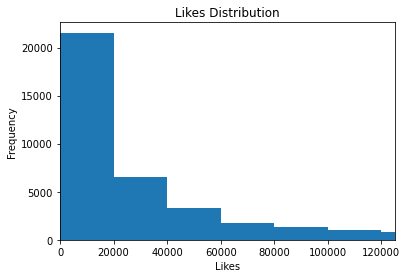

In [5]:
plt.hist(USData.likes,bins=np.arange(min(USData.likes), max(USData.likes) + 20000, 20000))
plt.xlim([0,125000])
plt.xlabel("Likes")
plt.ylabel("Frequency")
plt.title("Likes Distribution")

Text(0.5, 1.0, 'Dislikes Distribution')

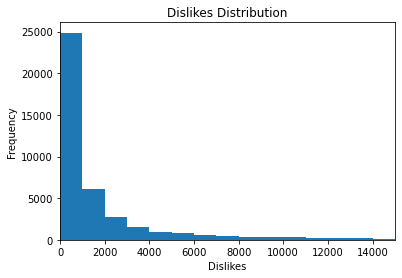

In [6]:
plt.hist(USData.dislikes,bins=np.arange(min(USData.dislikes), max(USData.dislikes) + 1000, 1000))
plt.xlim([0,15000])
plt.xlabel("Dislikes")
plt.ylabel("Frequency")
plt.title("Dislikes Distribution")

## Video Categories 

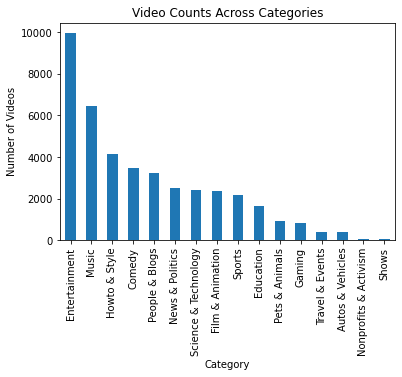

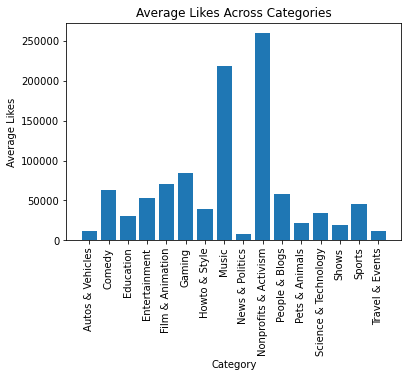

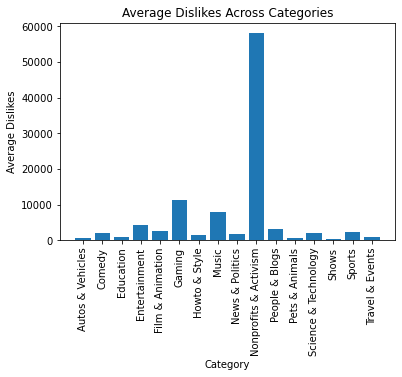

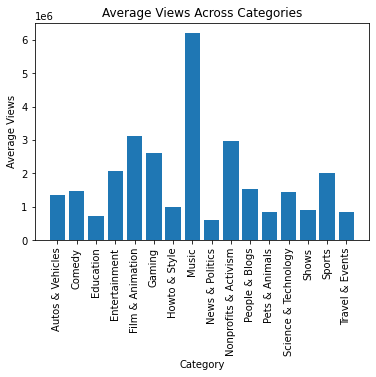

In [7]:
# Replacing category_id numbers with category based on JSON file
categoryDict = {1:"Film & Animation",2:"Autos & Vehicles",10:"Music",15:"Pets & Animals",17:"Sports",18:"Short Movies",19:"Travel & Events",20:"Gaming",21:"Videoblogging",22:"People & Blogs",23:"Comedy",24:"Entertainment",25:"News & Politics",26:"Howto & Style",27:"Education",28:"Science & Technology",29:"Nonprofits & Activism",30:"Movies",31:"Anime/Animation",32:"Action/Adventure",33:"Classics",34:"Comedy",35:"Documentary",36:"Drama",37:"Family",38:"Foreign",39:"Horror",40:"Sci-Fi/Fantasy,",41:"Thriller",42:"Shorts",43:"Shows",44:"Trailers"}
USData = USData.replace({"category_id": categoryDict})

# Distribution of different categories of videos 
USData.category_id.value_counts().plot(kind="bar")
plt.xlabel("Category")
plt.ylabel("Number of Videos")
plt.title("Video Counts Across Categories")
plt.show()

# Distribution of average likes for each category
avgCategoryLikes = []
categoryLabels = []
for videoCategory in np.unique(USData.category_id):
    categoryLabels.append(videoCategory)
    avgCategoryLikes.append(np.mean(USData[USData.category_id == videoCategory].likes))

plt.bar(categoryLabels, avgCategoryLikes, label='Likes')
plt.xlabel("Category")
plt.ylabel("Average Likes",)
plt.title("Average Likes Across Categories")
plt.xticks(rotation=90)
plt.show()

# Distribution of average dislikes for each category
avgCategoryDislikes = []
categoryLabels = []
for videoCategory in np.unique(USData.category_id):
    categoryLabels.append(videoCategory)
    avgCategoryDislikes.append(np.mean(USData[USData.category_id == videoCategory].dislikes))


plt.bar(categoryLabels, avgCategoryDislikes, label='Dislikes')
plt.xlabel("Category")
plt.ylabel("Average Dislikes",)
plt.title("Average Dislikes Across Categories")
plt.xticks(rotation=90)
plt.show()

# Distribution of average views for each category
avgCategoryViews = []
categoryLabels = []
for videoCategory in np.unique(USData.category_id):
    categoryLabels.append(videoCategory)
    avgCategoryViews.append(np.mean(USData[USData.category_id == videoCategory].views))

plt.bar(categoryLabels, avgCategoryViews, label='Views')
plt.xlabel("Category")
plt.ylabel("Average Views",)
plt.title("Average Views Across Categories")
plt.xticks(rotation=90)
plt.show()

## Likes to Dislikes Ratio

,0
0,19.395482
1,15.812724
2,27.352126
3,15.273273
4,66.483157
...,...
40944,27.552347
40945,157.089005
40946,46.577519
40947,67.799368


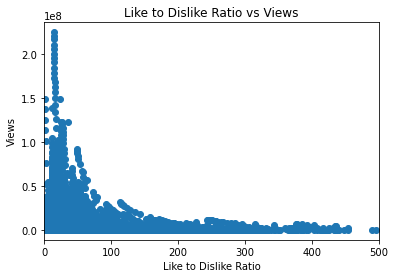

In [8]:
# Distribution of views for different ratios of likes to dislikes 
ratioLtoD = USData.likes/USData.dislikes
USData["ratio"] = ratioLtoD
plt.scatter(ratioLtoD, USData.views)
plt.xlim([0,500])
plt.xlabel("Like to Dislike Ratio")
plt.ylabel("Views")
plt.title("Like to Dislike Ratio vs Views")
ratioLtoD = pd.DataFrame(ratioLtoD)
ratioLtoD

## Separating Publish and Trending Dates

In [9]:
publishMonth = []
trendingMonth = []

publishYear = []
trendingYear = []

publishDay = []
trendingDay = []

# Array to store first split by -
sepDateTime1 = []
# Array to store second split by T
sepDateTime2 = []
# Array to store split by . for trending dates
sepDate = []


for eachTime in USData.publish_time:
    sepDateTime1 = eachTime.split("-")
    sepDateTime2.append(sepDateTime1[2].split("T"))
    publishYear.append(sepDateTime1[0])
    publishMonth.append(int(sepDateTime1[1]))
    publishDay.append(sepDateTime2[0])


# Adding new columns to dataset
USData["Year published"] = publishYear
USData["Month published"] = publishMonth
USData["Day published"] = publishDay

for eachDate in USData.trending_date:
    sepDate = eachDate.split(".")
    trendingYear.append(sepDate[0])
    trendingMonth.append(int(sepDate[2]))
    trendingDay.append(sepDate[1])
    
# Adding new columns to dataset 
USData["Year trending"] = trendingYear
USData["Month trending"] = trendingMonth
USData["Day trending"] = trendingDay


## Publish Month

Average month posted:  5.287430706488559


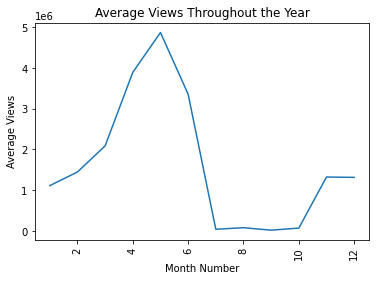

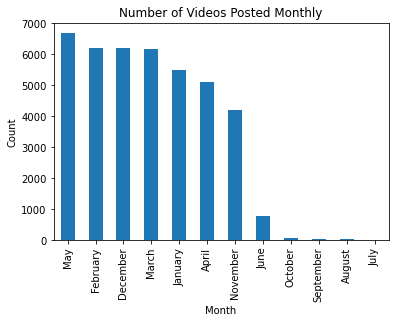

In [10]:
monthlyAvgViews = []
for i in range(1,13):
    monthlyAvgViews.append(np.mean(USData[USData["Month published"] == i].views))

print("Average month posted: ", np.mean(USData["Month published"]))  
plt.plot(np.unique(USData["Month published"]),monthlyAvgViews)
plt.xlabel("Month Number")
plt.ylabel("Average Views")
plt.title("Average Views Throughout the Year")
plt.xticks(rotation=90)
plt.show()

# Creating a dictionary for month numbers and replacing month columns for trending and publish dates 
monthsDict = {1:"January",2:"February",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",
             9:"September",10:"October",11:"November",12:"December"}
USData = USData.replace({"Month published": monthsDict})
USData = USData.replace({"Month trending": monthsDict})

USData["Month published"].value_counts().plot(kind="bar")
plt.xlabel("Month")
plt.ylabel("Count")
plt.title("Number of Videos Posted Monthly")
plt.show()



## Publish Day of the Week

Average day of week posted:  2.8020220273999366


Text(0.5, 1.0, 'Average Views During the Week')

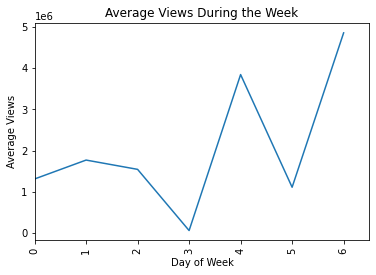

In [11]:
times = []
weekdays = []
for eachTime in sepDateTime2:
    eachTime[1] = eachTime[1].replace(".000Z","")
    times.append(eachTime[1].split(":"))
for i in range(len(times)):
    dateTimeObject = datetime.datetime(int(publishYear[i]),int(publishMonth[i]),int(publishDay[i][0]),int(times[i][0]),int(times[i][1]),int(times[i][2]))
    weekdays.append(dateTimeObject.weekday())
USData["Day published"] = weekdays
weekdayDict = {0:"Monday",1:"Tuesday",2:"Wednesday",3:"Thursday",4:"Friday",5:"Saturday",6:"Sunday"}
#USData = USData.replace({"Day published": weekdayDict})
#USData["Day published"].value_counts().plot(kind="bar")
#plt.show()

dayAvgViews = []
for i in range(0,7):
    dayAvgViews.append(np.mean(USData[USData["Day published"] == i].views))
    
print("Average day of week posted: ",np.mean(USData["Day published"]))
plt.plot(np.unique(USData["Day published"]),dayAvgViews)
plt.xticks(rotation=90)
plt.xlim([0,6.5])
#ax.set_xticklabels(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
plt.xlabel("Day of Week")
plt.ylabel("Average Views")
plt.title("Average Views During the Week")

## Publish Time of Day

Average hour posted:  13.766685389142593


Text(0.5, 1.0, 'Average Views Throughout the Day')

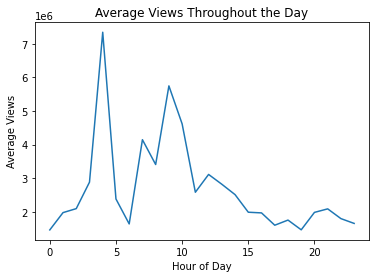

In [12]:
hours = []
timeAvgViews = []
for eachTime in times:
    hours.append(int(eachTime[0]))
USData["Publish hour"] = hours

print("Average hour posted: ",np.mean(hours))
for i in range(0,24):
    timeAvgViews.append(np.mean(USData[USData["Publish hour"] == i].views))
plt.plot(np.unique(hours),timeAvgViews)
plt.xlabel("Hour of Day")
plt.ylabel("Average Views")
plt.title("Average Views Throughout the Day")

## Tags

Mean number of tags used:  19.736330557522773


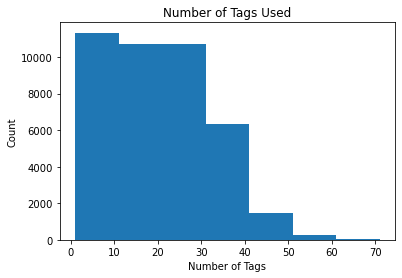

Text(0.5, 1.0, 'Tags vs Views')

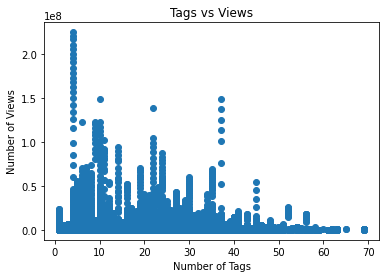

In [13]:
tags = []
numTags = []
for eachTag in USData.tags:
    tags.append(eachTag.split("|"))
for eachInfo in tags:
    numTags.append(len(eachInfo))
    
# Mean number of tags
print("Mean number of tags used: ",np.mean(numTags))

# Tag count
plt.hist(numTags,bins=np.arange(min(numTags), max(numTags) + 10, 10))
plt.xlabel("Number of Tags")
plt.ylabel("Count")
plt.title("Number of Tags Used")
plt.show()

# Tags vs views
plt.scatter(numTags,USData.views)
plt.xlabel("Number of Tags")
plt.ylabel("Number of Views")
plt.title("Tags vs Views")

## Length of Title

Average number of characters:  48.578182617402135


Text(0.5, 1.0, 'Number of Characters in Title vs Views')

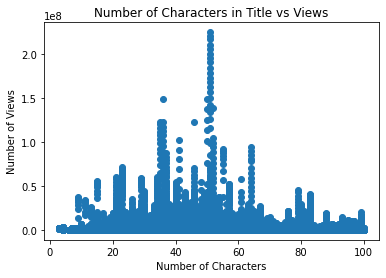

In [14]:
charArray = []
for eachTitle in USData.title:
    numCharacters = 0
    for eachWord in eachTitle:
        numCharacters = numCharacters + len(eachWord)
    charArray.append(numCharacters)

print("Average number of characters: ",np.mean(charArray))
plt.scatter(charArray,USData.views)
plt.xlabel("Number of Characters")
plt.ylabel("Number of Views")
plt.title("Number of Characters in Title vs Views")

## Number of Days to Become Trending

(707, 24)
17.14.11
17.14.11
17.14.11
17.14.11
17.14.11
17.14.11
17.14.11
17.14.11
17.14.11
17.14.11
17.14.11
17.14.11
17.14.11
17.14.11
17.14.11
17.14.11
17.14.11
17.14.11
17.14.11
17.14.11
17.14.11
17.14.11
17.14.11
17.14.11
17.14.11
17.14.11
17.14.11
17.14.11
17.14.11
17.14.11
17.14.11
17.14.11
17.14.11
17.14.11
17.14.11
17.14.11
17.14.11
17.14.11
17.14.11
17.14.11
17.14.11
17.14.11
17.14.11
17.14.11
17.14.11
17.14.11
17.14.11
17.14.11
17.14.11
17.14.11
17.14.11
17.14.11
17.14.11
17.14.11
17.14.11
17.14.11
17.14.11
17.14.11
17.14.11
17.14.11
17.14.11
17.14.11
17.14.11
17.14.11
17.14.11
17.14.11
17.14.11
17.14.11
17.14.11
17.15.11
17.15.11
17.15.11
17.15.11
17.15.11
17.15.11
17.15.11
17.16.11
17.16.11
17.16.11
17.16.11
17.16.11
17.16.11
17.16.11
17.16.11
17.16.11
17.16.11
17.16.11
17.17.11
17.17.11
17.17.11
17.17.11
17.17.11
17.17.11
17.17.11
17.17.11
17.17.11
17.18.11
17.18.11
17.18.11
17.18.11
17.18.11
17.19.11
17.19.11
17.20.11
17.20.11
17.20.11
17.20.11
17.20.11
17.20.11
17.20.11


([], [])

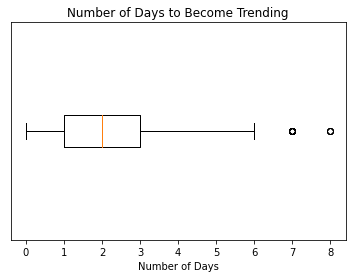

In [18]:
# Removing duplicate video ids
uniqueIds = []
for eachId in USData.video_id:
    index = USData[USData["video_id"]==eachId].index.values
    if eachId not in uniqueIds:
        uniqueIds.append(eachId)
    else:
        USData.drop(index,inplace=True)
print(USData.shape)
# # Calculating difference in publish date and trending date for original dataset
daysDiff = []
for i in range(len(USData)):
    trendDate = USData.trending_date.iloc[i]
    trendSplit = trendDate.split(".")
    trendSplit[0] = "20" + trendSplit[0] 
    publishDate = USData.publish_time.iloc[i]
    publishSplit1 = publishDate.split("-")
    publishSplit2 = publishSplit1[2].split("T")
    publishedDate = datetime.datetime(int(publishSplit1[0]),int(publishSplit1[1]),int(publishSplit2[0]))
    trendingDate = datetime.datetime(int(trendSplit[0]),int(trendSplit[2]),int(trendSplit[1]))
    if ((trendingDate-publishedDate).days == 4215):
        print(trendingDate)
        print(publishedDate)
    daysDiff.append((trendingDate-publishedDate).days)

print(daysDiff)
# Calculating average days
nonOutliers = []
Q1 = np.percentile(daysDiff, 25)
Q3 = np.percentile(daysDiff, 75)
IQR = iqr(daysDiff, axis=0)
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
outlierCount = 0
for i in range(len(daysDiff)):
    if (daysDiff[i] > lower) & (daysDiff[i] < upper):
        nonOutliers.append(daysDiff[i])
    else:
        outlierCount = outlierCount + 1
print("Average days: ", np.mean(nonOutliers)) 

# Graphing difference in days
nonOutliers = pd.DataFrame(nonOutliers)
plt.boxplot(nonOutliers,vert=False)
plt.xlabel("Number of Days")
plt.title("Number of Days to Become Trending")
plt.yticks([])


In [16]:
# Splitting into training and testing data
training_data, testing_data = train_test_split(USData, test_size=0.5, random_state=25)

# Calculating difference in publish date and trending date for training set 
daysDiffTraining = []
for i in range(len(training_data)):
    trendDate = training_data.trending_date.iloc[i]
    trendSplit = trendDate.split(".")
    trendSplit[0] = "20" + trendSplit[0] 
    publishDate = training_data.publish_time.iloc[i]
    publishSplit1 = publishDate.split("-")
    publishSplit2 = publishSplit1[2].split("T")
    publishedDate = datetime.datetime(int(publishSplit1[0]),int(publishSplit1[1]),int(publishSplit2[0]))
    trendingDate = datetime.datetime(int(trendSplit[0]),int(trendSplit[2]),int(trendSplit[1]))
    daysDiffTraining.append((trendingDate-publishedDate).days)
   

 # Calculating difference in publish date and trending date for training set 
daysDiffTesting = []
for i in range(len(testing_data)):
    trendDate = testing_data.trending_date.iloc[i]
    trendSplit = trendDate.split(".")
    trendSplit[0] = "20" + trendSplit[0] 
    publishDate = testing_data.publish_time.iloc[i]
    publishSplit1 = publishDate.split("-")
    publishSplit2 = publishSplit1[2].split("T")
    publishedDate = datetime.datetime(int(publishSplit1[0]),int(publishSplit1[1]),int(publishSplit2[0]))
    trendingDate = datetime.datetime(int(trendSplit[0]),int(trendSplit[2]),int(trendSplit[1]))
    daysDiffTesting.append((trendingDate-publishedDate).days)

# Creating dummy variables for training set
dummyColumnTrain = []
count0 = 0
count1 = 0
for i in range(len(daysDiffTraining)):
    if daysDiffTraining[i] < 3:
        dummyColumnTrain.append(0)
        count0 = count0 + 1
    else:
        dummyColumnTrain.append(1)
        count1 = count1 + 1

# Creating dummy variables for testing set
dummyColumnTest = []
count0 = 0
count1 = 0
for i in range(len(daysDiffTesting)):
    if daysDiffTesting[i] < 3:
        dummyColumnTest.append(0)
        count0 = count0 + 1
    else:
        dummyColumnTest.append(1)
        count1 = count1 + 1

# Logistic regression 
x = training_data[["likes","dislikes"]]
x2 = testing_data[["likes","dislikes"]]

y = dummyColumnTrain
y2 = dummyColumnTest

clf = LogisticRegression(class_weight = "balanced", random_state = 0)
clf.fit(x, y)
y_prob1 = clf.predict_proba(x)
y_prob2 = clf.predict_proba(x2)

y_pred1 = (y_prob1 > 0.49)*1
#y_pred2 = (y_prob2[:, 1] > 0.49)*1
y_pred2 = (y_prob2 > 0.49)*1

y_pred2

print(classification_report(y, y_pred1))
print(confusion_matrix(y, y_pred1))
print(classification_report(y2, y_pred2))
print(confusion_matrix(y2, y_pred2))

ValueError: Classification metrics can't handle a mix of binary and multilabel-indicator targets

In [ ]:
plt.scatter(daysDiffTraining,training_data.dislikes)
plt.xlim([-1,15])
plt.ylim([0,7000])
plt.xlabel("Days to Become Trending")
plt.ylabel("Dislikes")
plt.title("Days Difference vs Dislikes")

In [ ]:
plt.scatter(daysDiffTraining,training_data.likes)
plt.xlim([-1,15])
plt.ylim([0,200000])
plt.xlabel("Days to Become Trending")
plt.ylabel("Likes")
plt.title("Days Difference vs Likes")

In [ ]:
plt.scatter(x2['dislikes'], y_pred2[:,1])
plt.xlabel("Likes")
plt.ylabel("Prob(y>0.49)")
plt.title("Logistic Regression for Likes")

In [ ]:
plt.scatter(testing_data[["dislikes"]], y_pred2)
plt.xlabel("Disikes")
plt.ylabel("Prob(y>0.49)")
plt.title("Logistic Regression for Dislikes")